In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('IHME_GBD_2019_SMOKING_TOB_1990_2019_NUM_SMOKERS_Y2021M05D27.CSV')

print(df.head())


        measure_name  location_id location_name  sex_id sex_name  \
0  Number of Smokers            1        Global       1     Male   
1  Number of Smokers            1        Global       2   Female   
2  Number of Smokers            1        Global       3     Both   
3  Number of Smokers            1        Global       1     Male   
4  Number of Smokers            1        Global       2   Female   

   age_group_id age_group_name  year_id          val         upper  \
0            29      15+ years     1990  803101467.1  8.096221e+08   
1            29      15+ years     1990  189148834.0  1.930929e+08   
2            29      15+ years     1990  992250301.2  1.000161e+09   
3            29      15+ years     1991  813897216.4  8.200339e+08   
4            29      15+ years     1991  190537545.1  1.944249e+08   

         lower  
0  795908635.8  
1  185559469.9  
2  984788043.8  
3  806951447.9  
4  186974424.5  


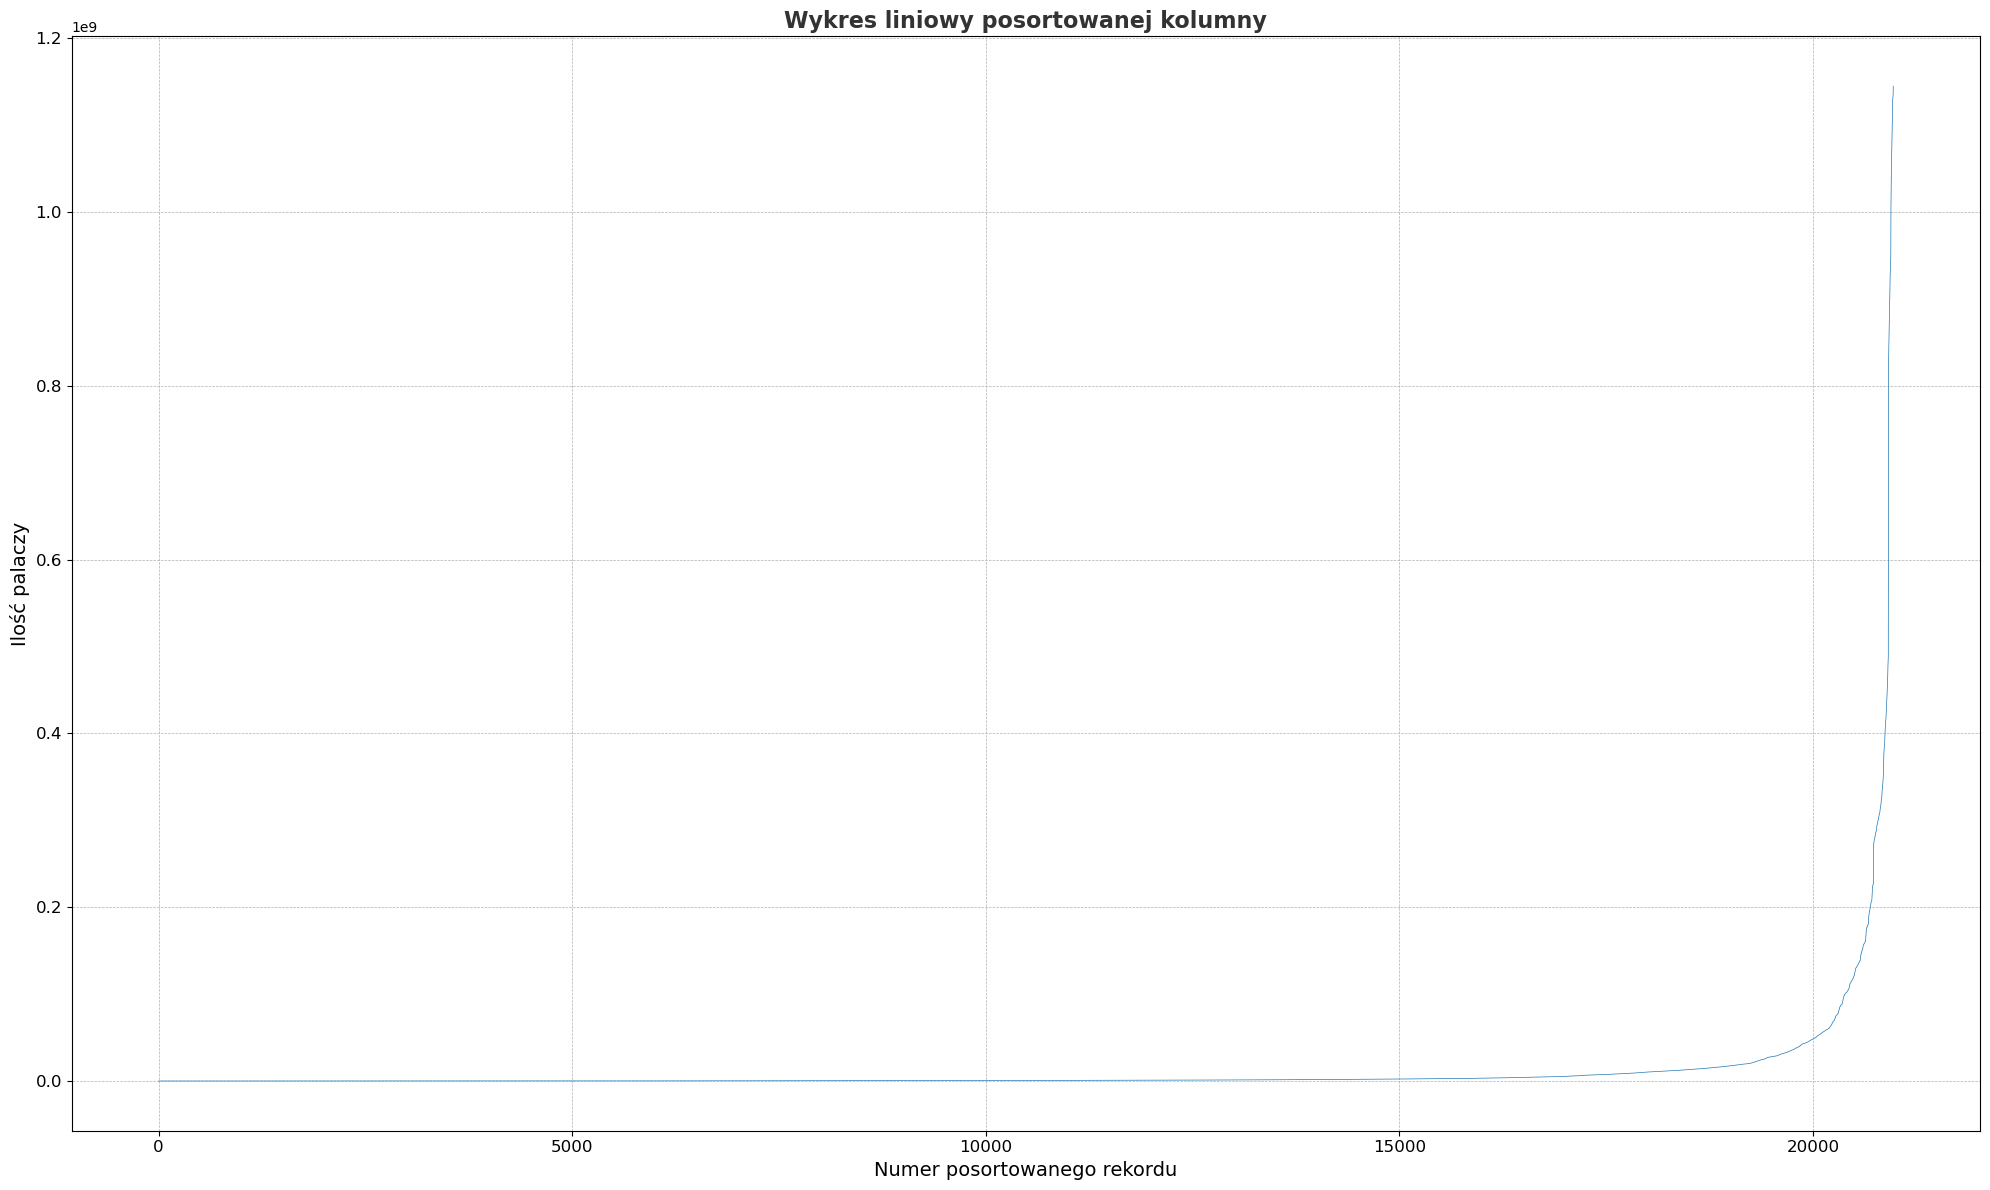

In [2]:
# Wybieramy kolumnę (np. kolumnę 'A'), sortujemy rosnąco
sorted_column = df['val'].sort_values().reset_index(drop=True)

# Rysowanie wykresu liniowego
# Ulepszony wygląd wykresu
plt.figure(figsize=(20, 12))
plt.plot(sorted_column, marker='o', linestyle='-', color='#1f77b4', linewidth=0.5, markersize=0, markerfacecolor='orange', markeredgewidth=1)

# Dodanie siatki, tytułu, etykiet i stylizacji
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.title('Wykres liniowy posortowanej kolumny', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Numer posortowanego rekordu', fontsize=14)
plt.ylabel('Ilość palaczy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

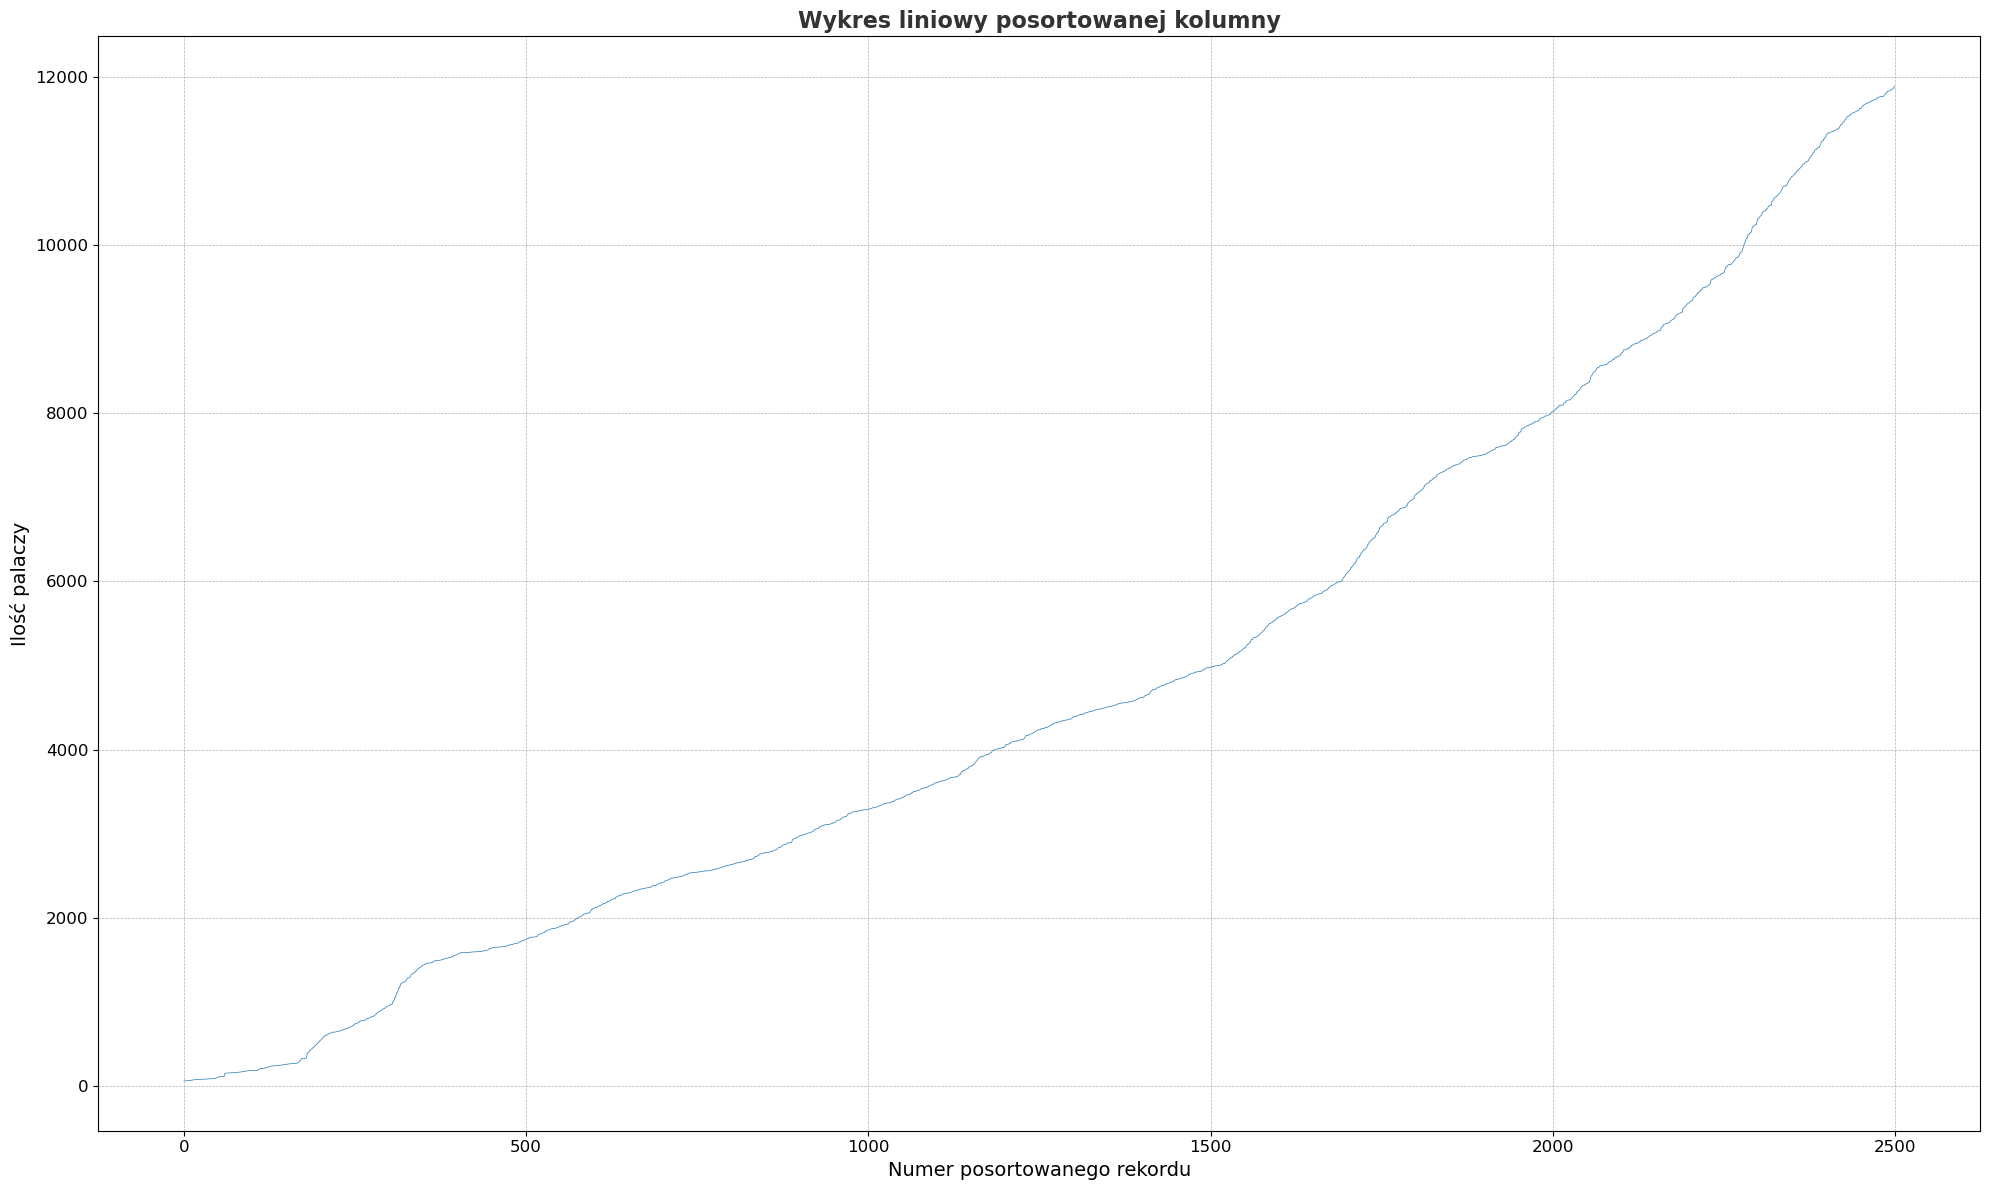

In [3]:
# Wybieramy kolumnę (np. kolumnę 'A'), sortujemy rosnąco
sorted_column = df['val'].sort_values().reset_index(drop=True).head(2500)

# Rysowanie wykresu liniowego
# Ulepszony wygląd wykresu
plt.figure(figsize=(20, 12))
plt.plot(sorted_column, marker='o', linestyle='-', color='#1f77b4', linewidth=0.5, markersize=0, markerfacecolor='orange', markeredgewidth=1)

# Dodanie siatki, tytułu, etykiet i stylizacji
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.title('Wykres liniowy posortowanej kolumny', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Numer posortowanego rekordu', fontsize=14)
plt.ylabel('Ilość palaczy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


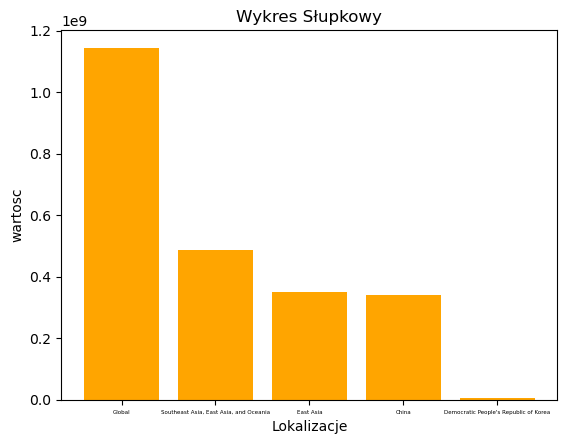

In [4]:
# Wykres słupkowy 

df_1 = df.head(400)
plt.bar(df_1['location_name'],df_1['val'],color='orange')
plt.xlabel("Lokalizacje")
plt.ylabel("wartosc")
plt.xticks(fontsize=4) #czcionka na osi x pod wykresem
plt.title("Wykres Słupkowy")
plt.show()

Text(0.5, 1.0, 'Histogram')

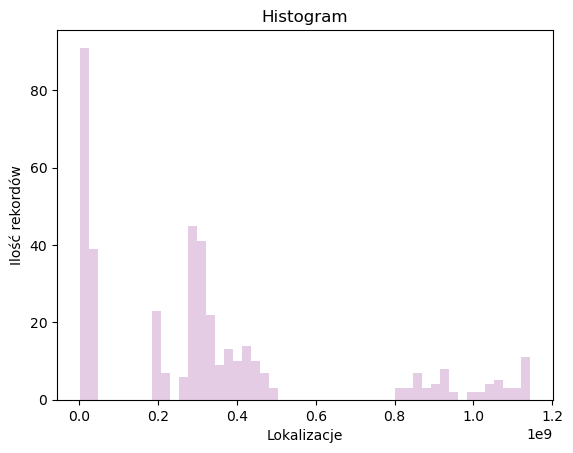

In [5]:
#Histogram
plt.hist(df_1['val'],bins=50,color='purple',alpha=0.2)
plt.xlabel("Lokalizacje")
plt.ylabel("Ilość rekordów")
plt.title("Histogram")

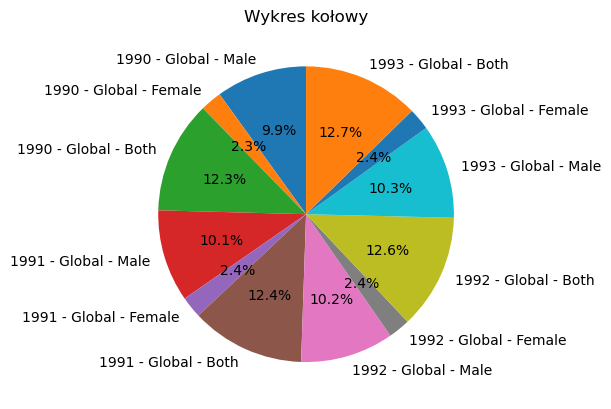

In [6]:
#Wykres kołowy

df_2 = df_1.head(12)

# Tworzymy etykiety łączące year_id i location_name
labels = df_2.apply(lambda row: f"{row['year_id']} - {row['location_name']} - {row['sex_name']}", axis=1)

# Tworzymy wykres kołowy
plt.pie(df_2['val'], labels=labels, startangle=90, autopct='%1.1f%%')  # Dodano autopct do wyświetlania procentów
plt.title('Wykres kołowy')
plt.show()

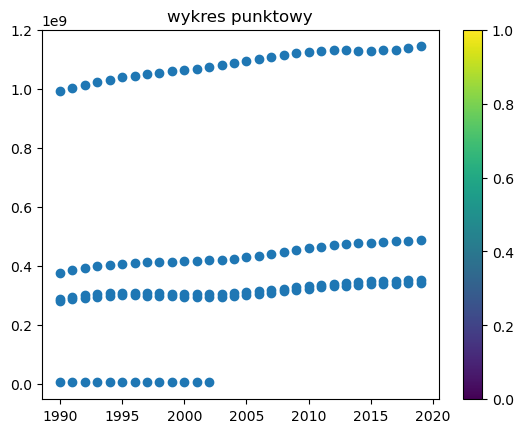

In [10]:
#Scatter Plot
filtered_df = df_1[df_1['sex_name'] == 'Both']

plt.scatter(filtered_df['year_id'],filtered_df['val'])
plt.colorbar()
plt.title('wykres punktowy')
plt.show()

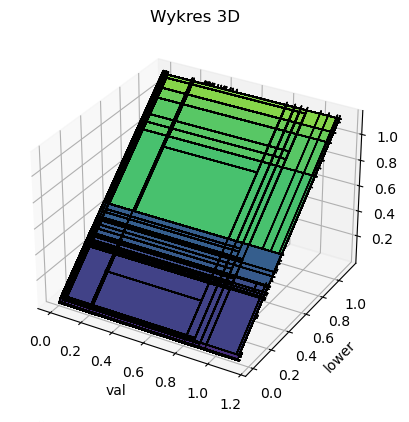

In [20]:
#wykres 3D
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
X = df_1['val'].values
Y = df_1['lower'].values
Z = df_1['upper'].values

# Tworzenie siatki dla danych
X, Y = np.meshgrid(X, Y)

# Przypisanie Z na podstawie df_1['upper']
Z = np.outer(df_1['upper'].values, np.ones_like(df_1['val'].values))

# Tworzenie wykresu 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Rysowanie powierzchni
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

# Dodanie tytułów i etykiet
ax.set_title('Wykres 3D')
ax.set_xlabel('val')
ax.set_ylabel('lower')
ax.set_zlabel('upper')

plt.show()